### Student Information
Name: 黃為翰 

Student ID: 113065508

GitHub ID:  hhhwei23

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [241]:
### Begin Assignment Here

### Loading Dataset

In [242]:
import pandas as pd
categories = ['not nostalgia', 'nostalgia']

dataSet = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

print(dataSet.head()) # print top 5 lines

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


### Check data information

Try to isolate the target and data text for possibly furthur usage

In [243]:
target = dataSet['sentiment'].tolist()
target_df = pd.DataFrame(target, columns=['sentiment'])
data = dataSet['comment'].tolist()
data_df = pd.DataFrame(data, columns=['comment'])

print("Target: ", target)
print("Data: ", data[0:2])

Target:  ['not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia',

In [244]:
for text in data[0:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


In [245]:
import helpers.data_mining_helpers as dmh

for t in dataSet["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


To have easier access of sentiment, I add another column to represent 
* 0--> not nostalgia
* 1--> nostalgia

In [246]:
import pandas as pd

dataSet['sent_num'] = dataSet['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [247]:
dataSet[0:10]

,sentiment,comment,sent_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
5,nostalgia,"Every time I heard this song as a child, I use...",1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1
8,not nostalgia,Wherever you are you always in my heart,0
9,not nostalgia,Elvis will always be number one no one can com...,0


In [248]:
# Sampling
sampled = dataSet.sample(n = 10)
print(sampled)

          sentiment                                            comment  \
499       nostalgia  this was my mums favorite song but died when i...   
94    not nostalgia  Great words great song....Its sad we don't hea...   
532       nostalgia  Went to Cardiff Wales UK to see Billy Eckstine...   
990   not nostalgia  English is not my mother tongue, but I can hea...   
1450      nostalgia  when i was a kid, my father liked to open this...   
1274      nostalgia  I'm 18 again. It's the summer of 1988 and the ...   
998       nostalgia      Beautiful song reminds me of when I was young   
178       nostalgia  Memories, memories,is sad that they gonna but ...   
108   not nostalgia  Always was and always will be the greatest,alw...   
1242  not nostalgia  I have a certain man on my mind, omg his hugs ...   

      sent_num  
499          1  
94           0  
532          1  
990          0  
1450         1  
1274         1  
998          1  
178          1  
108          0  
1242         0 

### Data Mining Section (Pandas)

In [249]:
# check null
dataSet.isnull()

,sentiment,comment,sent_num
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [250]:
dataSet.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sent_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [251]:
sum(dataSet.duplicated())

1

there is one duplicated data, now I need to eliminate that data

(Keep the first appeared data, delete the second one)

In [252]:
dataSet.drop_duplicates(keep='first', inplace=True)

In [253]:
len(dataSet)

1499

### Data Preprocessing
Using matplotlob to visualization

In [254]:
import matplotlib.pyplot as plt

categories

['not nostalgia', 'nostalgia']

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='sentiment'>

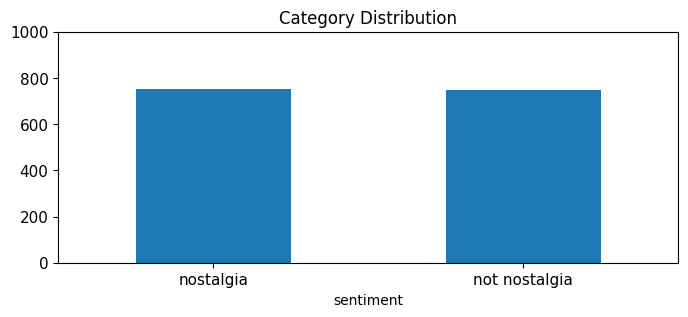

In [255]:
print(dataSet['sentiment'].value_counts())

dataSet['sentiment'].value_counts().plot(kind='bar',
                              title='Category Distribution',
                              ylim=[0, 1000],
                              rot = 0, fontsize=11, figsize=(8, 3))

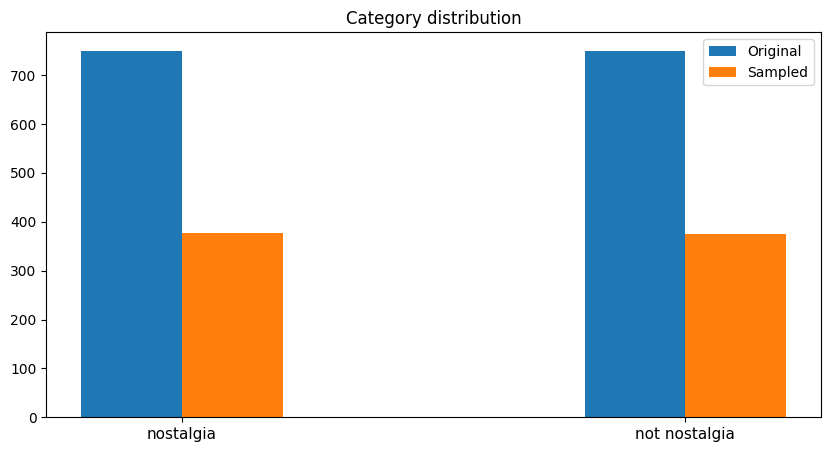

In [256]:
import numpy as np
X_sampled = dataSet.sample(n = 750)

X_counts = dataSet['sentiment'].value_counts()
X_sample_counts = X_sampled['sentiment'].value_counts()

bar_width = 0.2

index = np.arange(len(X_counts))

fig, ax = plt.subplots(figsize = (10, 5))

bar1 = ax.bar(index, X_counts, bar_width, label = 'Original')
bar2 = ax.bar(index + bar_width, X_sample_counts, bar_width, label = 'Sampled')

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(X_counts.index, rotation = 0, fontsize = 11)
ax.set_title("Category distribution")

ax.set_ylim = [0, max(X_counts.value_counts() + 50)]

ax.legend()

plt.show()


### Feature creation

In [257]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Use unigram to seperate comment words

In [258]:
X = dataSet
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

X[0:5]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [259]:
X[0:5]

,sentiment,comment,sent_num,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


### Feature Selection

Generate a matrix of original dataset

In [260]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
X_vec = count_vec.fit_transform(X["comment"])
print(X_vec[0:2])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 66 stored elements and shape (2, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
  (1, 3570)	1
  (1, 3534)	2
  (1, 2028)	1
  (1, 3336)	1
  (1, 3284)	2
  (1, 1651)	1
  (1, 2341)	1
  (1, 258)	1
  (1, 3124)	1
  (1, 2186)	1
  (1, 410)	1
  (1, 1177)	1
  (1, 1983)	1
  (1, 1646)	1
  (1, 3610)	1
  (1, 1876)	1
  (1, 2976)	1
  (1, 2287)	1
  (1, 1358)	1
  (1, 256)	1
  (1, 259)	1


In [261]:
count_vec.get_feature_names_out()[1598]

'he'

In [262]:
analyze = count_vec.build_analyzer()

analyze(X["comment"][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [263]:
X_vec.shape

(1499, 3730)

In [264]:
X_vec[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [265]:
count_vec.get_feature_names_out()[0]

'00'

This result is same as result in Master

Now, I do the visualization for furthur usage

In [266]:
# get only head(20)
plot_x = ["term_"+str(i) for i in count_vec.get_feature_names_out()[0:20]]

plot_x

['term_00',
 'term_000',
 'term_045',
 'term_07',
 'term_10',
 'term_100',
 'term_10m',
 'term_11',
 'term_11th',
 'term_12',
 'term_13',
 'term_14',
 'term_15',
 'term_150',
 'term_16',
 'term_16years',
 'term_17',
 'term_17th',
 'term_18',
 'term_19']

In [267]:
# top 20 documents
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [268]:
plot_z = X_vec[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

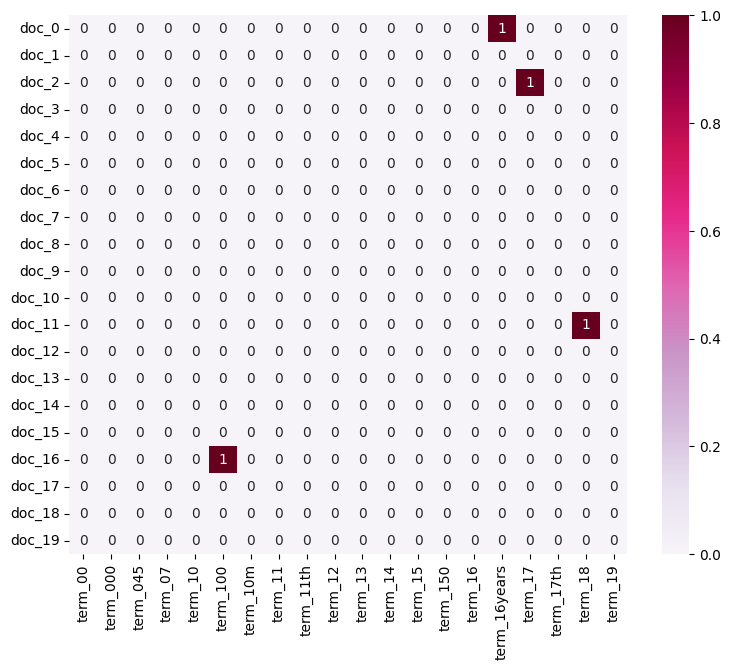

In [269]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Attribute Transformation and Aggregation

In [270]:
term_frequencies = []
for j in range(0,X_vec.shape[1]):
    term_frequencies.append(sum(X_vec[:,j].toarray()))

print(X_vec)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31249 stored elements and shape (1499, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (1498, 2254)	2
  (1498, 1798)	1
  (1498, 3704)	2
  (1498, 1923)	1
  (1498, 3300)	3
  (1498, 3044)	2
  (1498, 1026)	1
  (1498, 2699)	1
  (1498, 3504)	1
  (1498, 1308)	1
  (1498, 208)	2
  (1498, 516)	1
  (1498, 637)	1
  (1498, 78)	1
  (1498, 1132)	1
  (1498, 863)	1
  (1498, 603)	2
  (1498, 3637)	1
  (1498, 1049)	1
  (1498, 87)	1
  (1498, 2027)	1
  (1498, 2089)	1
  (1498, 998)	1
  (1498, 3414)	1
  (1498, 2779)	1


In [271]:
term_frequencies = np.asarray(X_vec.sum(axis=0))[0]

term_frequencies[0]

np.int64(1)

C:\Users\hans\AppData\Local\Temp\ipykernel_23192\931169660.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



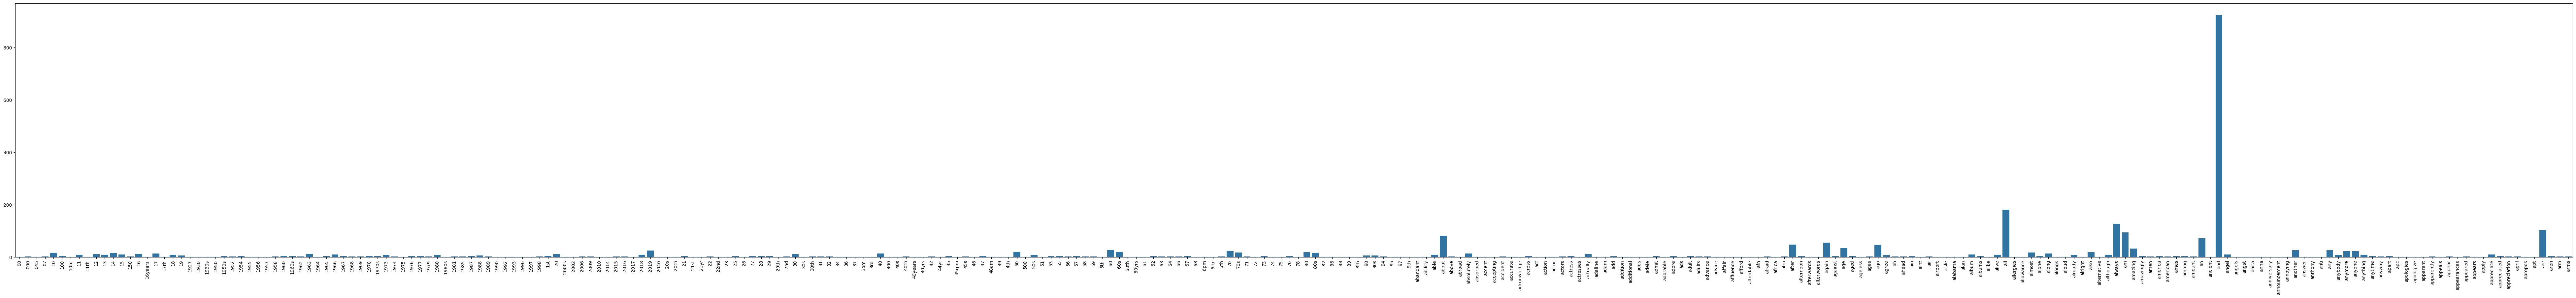

In [272]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vec.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vec.get_feature_names_out()[:300], rotation = 90);

I use freq>100 to find the words with higher frequency of usage

In [273]:
import pandas as pd
import plotly.express as px

term_frequencies = np.asarray(X_vec.sum(axis=0))[0]

data = {
    'Terms':count_vec.get_feature_names_out(),
    'Freq':term_frequencies
}

df = pd.DataFrame(data)

df_filtered = df[df['Freq'] > 100]

fig = px.bar(df_filtered,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()

Show the top 50 terms and sorted to have better information

In [274]:
# Answer here

df_sorted = df.sort_values(by='Freq', ascending=False)

top = df_sorted.head(50)

fig = px.bar(top,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()


Add log to see whether there is significant difference

C:\Users\hans\AppData\Local\Temp\ipykernel_23192\863861590.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



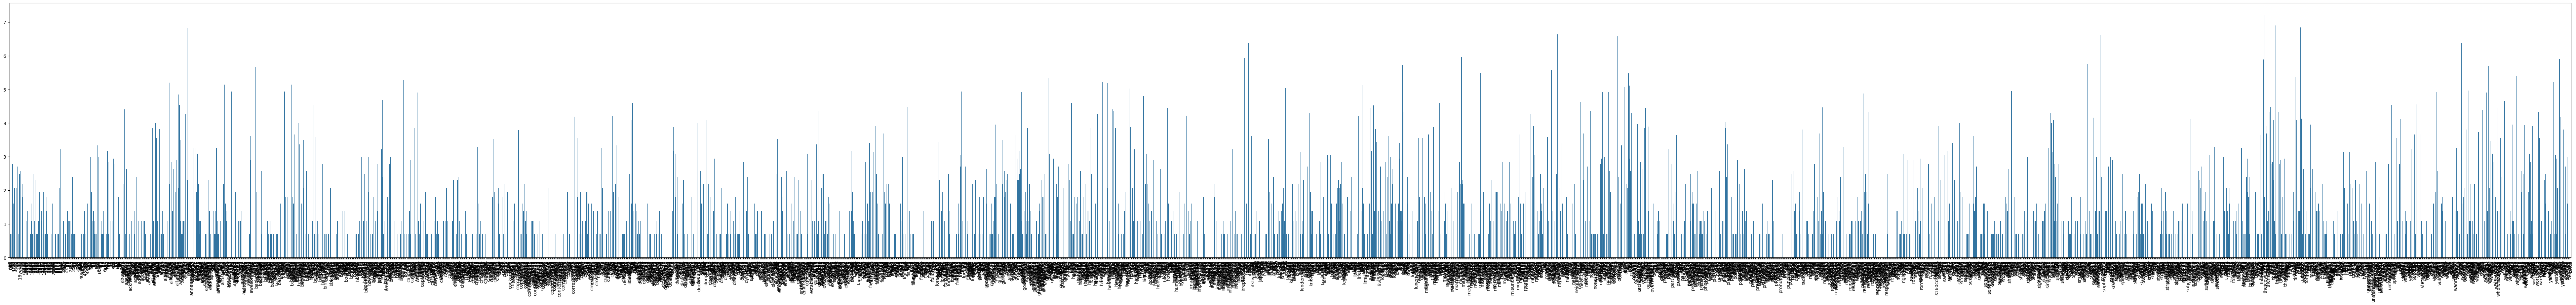

In [275]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vec.get_feature_names_out(),
                y=term_frequencies_log)
g.set_xticklabels(count_vec.get_feature_names_out(), rotation = 90);

Figure after sorting the log(frequency)

In [276]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

data = {
    'Terms':count_vec.get_feature_names_out(),
    'Freq':term_frequencies_log
}

df = pd.DataFrame(data)
df_top = df.head(300)

df_top = df_top.sort_values(by='Freq', ascending=False)

fig = px.bar(df_top,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()


The distribution become stair like, and the difference become smaller.

### Finding Frequent Patterns

In [277]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment'].unique()
category_dfs = {} # --> to store Dataframes for each category

for category in categories:
    category_dfs[category] = X[X['sentiment'] == category].copy()

print(len(category_dfs))

category_dfs

2


{'not nostalgia':           sentiment                                            comment  \
 0     not nostalgia  He was a singer with a golden voice that I lov...   
 3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
 8     not nostalgia           Wherever you  are you always in my heart   
 9     not nostalgia  Elvis will always be number one no one can com...   
 10    not nostalgia  ill bet if they begin to play this song on the...   
 ...             ...                                                ...   
 1493  not nostalgia  He really has that "love you like a brother" l...   
 1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
 1495  not nostalgia  i don't know!..but the opening of the video,.....   
 1496  not nostalgia  it's sad this is such a beautiful song when yo...   
 1497  not nostalgia  Dear Friend, I think age and time is not that ...   
 
       sent_num                                           unigrams  
 0          

Function to create term-document frequency dataframe

In [278]:
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

In [279]:
term_doc_dfs = {}

for category in categories:
    term_doc_dfs[category] = create_term_document_df(category_dfs[category])

print(len(term_doc_dfs))

term_doc_dfs

2


{'not nostalgia':      00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
 0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 ..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
 744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 
      your  yourself  youth  yout

In [280]:
categories

array(['not nostalgia', 'nostalgia'], dtype=object)

In [281]:
category_number = 0

term_doc_dfs[categories[category_number]]

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [282]:
term_doc_dfs['not nostalgia']

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


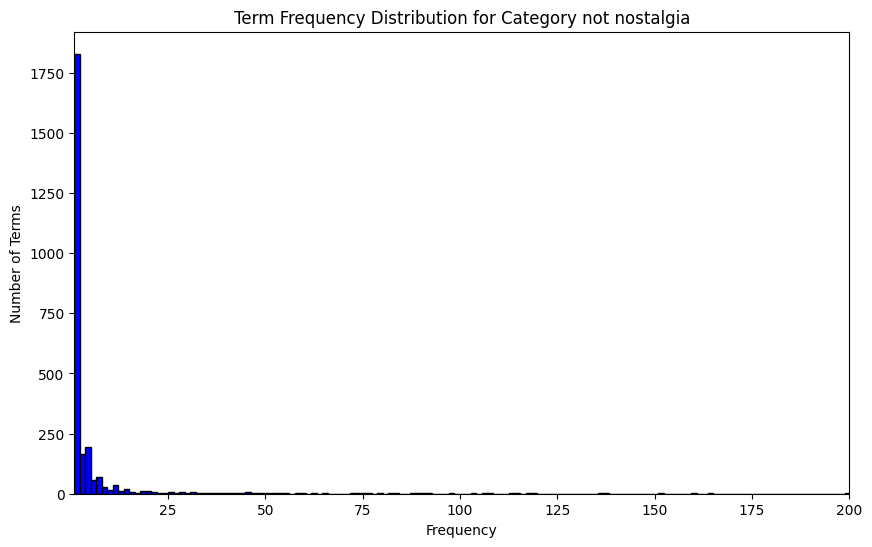

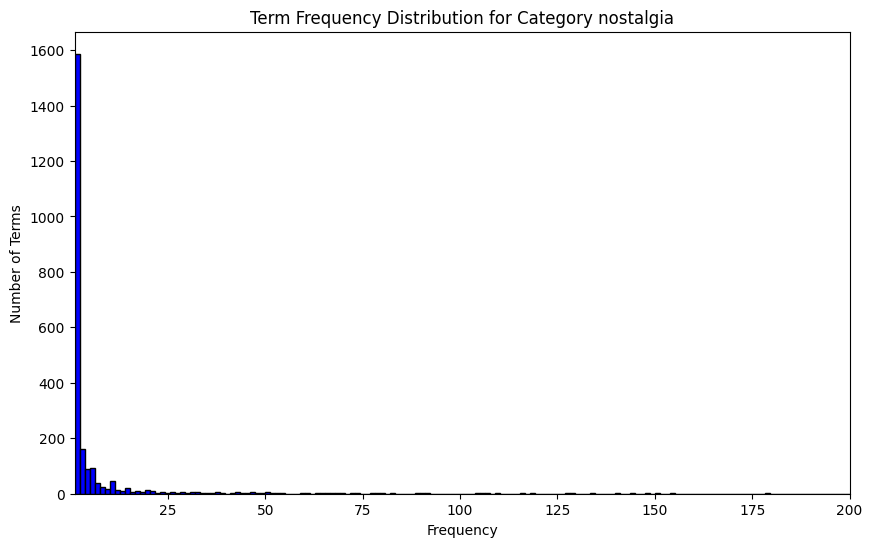

In [283]:
 # Sum over all documents to get total frequency for each word
for category_number in [0, 1]:
    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)
    plt.show()

Filtering top 5% and bottom 1%

In [284]:
# remove top 5%
for category_number in [0, 1]:
    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    # Sort the term frequencies in descending order
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
    sorted_indices = np.argsort(sorted_counts) # Get indices of sorted frequencies

    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)

    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [count_vec.get_feature_names_out()[i] for i in top_5_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['purpose', 'prom', 'prolific', 'puts', 'jerk', 'jensen', 'jeez', 'jees', 'jeans', 'japanese', 'japan', 'january', 'jams', 'jamison', 'jamie', 'punk', 'put', 'punishment', 'pull', 'pubs', 'pub', 'ps', 'proud', 'protest', 'protect', 'props', 'proper', 'proof', 'putting', 'quality', 'quando', 'principle', 'precious', 'pray', 'praises', 'princilla', 'princess', 'prime', 'primary', 'priceless', 'previous', 'prevalent', 'pretty', 'pretensions', 'pretend', 'press', 'presley', 'presidents', 'popstars', 'pops', 'pop', 'presenting', 'presented', 'presentation', 'present', 'presence', 'prepare', 'prep', 'preferred', 'prefer', 'predictions', 'predicting', 'predict', 'predating', 'plays', 'playing', 'player', 'praise', 'practice', 'powerful', 'power', 'postings', 'posting', 'posters', 'posted', 'post', 'possibly', 'portland', 'popularity', 'popular', 'pinup', 'pink', 'pin', 'poor', 'poll', 'political', 'police', 'points', 'poin

In [285]:
# remove bottom 1%
for category_number in [0, 1]:

    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    # Sort the term frequencies in ascending order and get sorted indices
    sorted_counts = word_counts[sorted_indices]  # Sort frequencies
    sorted_indices = np.argsort(sorted_counts)  # Get indices of sorted frequencies

    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)

    # Get the indices of the bottom 1% least frequent terms
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

    # Filter terms that belong to the bottom 1% based on their rank
    filtered_words = [count_vec.get_feature_names_out()[i] for i in bottom_1_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['name', 'germany', '1960s', '1958', 'george', '1955', '1954', 'genres', '1950s', '1950', '1930', '1927', '07', 'nice', 'genre', '16', '1973', '1970s', '1970', '1968', 'nearest', 'genesis']
Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['15', '11', '10m', '10', 'fear', 'favourites', 'fast', 'fashioned', 'fashionable', 'far', 'fantastic', 'fever', 'female', 'fellows', 'fella', 'feels', 'nana', 'nan', 'names', 'named', 'name', '1963']


I found top 5% terms and bottom 1% terms, now I can filter them out.

In [296]:
def filter_top_bottom_words_by_sum(term_doc_df, top_per = 0.05, bot_per = 0.01):
    word_sums = term_doc_df.sum(axis=0)
    sorted_words = word_sums.sort_values()

    total_words = len(sorted_words)
    top_n = int(top_per * total_words)
    bot_n = int(bot_per * total_words)

    words_remove = pd.concat([sorted_words.head(bot_n), sorted_words.tail(top_n)]).index

    return term_doc_df.drop(columns=words_remove)

In [297]:
category_number = 0

filtered_term_doc_dfs = {}

for category in categories:
    filtered_term_doc_dfs[category] = filter_top_bottom_words_by_sum(term_doc_dfs[category])
term_doc_dfs = filtered_term_doc_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_doc_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,14,15,150,...,yeah,yesterday,younger,youngest,youngsters,yourself,youth,yrs,yuo,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
category_number = 1

filtered_term_doc_dfs = {}

for category in categories:
    filtered_term_doc_dfs[category] = filter_top_bottom_words_by_sum(term_doc_dfs[category])
term_doc_dfs = filtered_term_doc_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_doc_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,19,1950s,1954,1960,1960s,1962,1965,1968,1970s,...,worry,written,wrote,ya,yarbirds,yardbirds,yeh,yokel,youthful,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
